In [11]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LINA
from sklearn.neural_network import MLPRegressor

In [12]:
X = np.loadtxt('Viscosity.txt')
n = X.shape[0]
d = X.shape[1]
d -= 1
print(n,d)

499 190


In [13]:
n_train = int(n*0.8)
n_test  = n - n_train
X = np.random.permutation(X)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = X[:n_train,:-1]
Y_train[:] = np.log(X[:n_train,-1])

X_test[:] = X[n_train:,:-1]
Y_test[:] = np.log(X[n_train:,-1])

print(X_train.shape)
print(X_test.shape)

f = open('Deslist','r')
Deslist = []
for line in f:
    Deslist.append(line.strip('\n\t'))
print(Deslist)

(399, 190)
(100, 190)
['steiger', 'Marsili Partial Charges', 'BalabanJ', 'BertzCT', 'Ipc', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'Chi0', 'Chi1', 'Chi0n', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v', 'MolLogP', 'MolMR', 'MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount', 'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'RingCount', 'TPSA', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SMR_VSA10', 'SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'EState_VSA1', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', '

In [19]:
clf = MLPRegressor(hidden_layer_sizes=(1,))
clf.fit(X_train,Y_train)

/Users/prguser/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

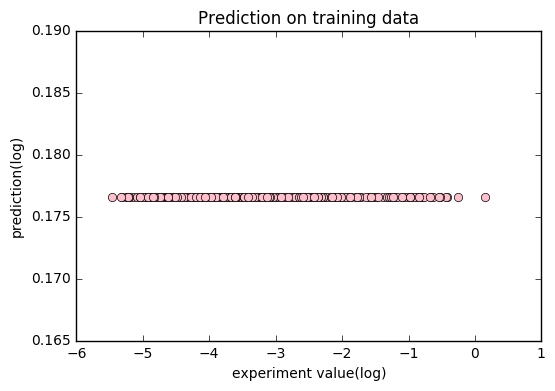

In [20]:
plt.plot(Y_train,clf.predict(X_train),"o",color ='pink')
#plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
#plt.axis([-6,1,-6,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on training data')
plt.show()

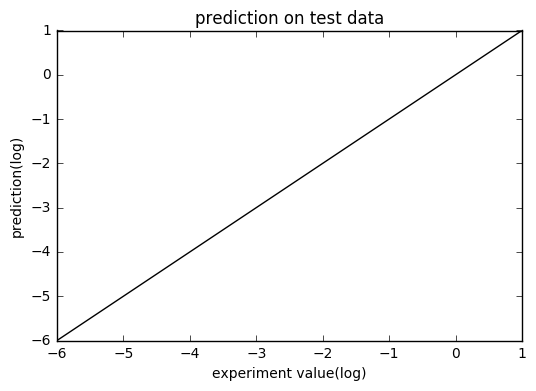

In [17]:
plt.plot(Y_test,clf.predict(X_test),"o",color ='pink')
#plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
#plt.axis([-6,1,-6,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('prediction on test data')
plt.show()